### One-Way ANOVA

* The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable. It essentially answers the question: do any of the group means differ from one another? We won't get into the details of carrying out an ANOVA by hand as it involves more calculations than the t-test, but the process is similar: you go through several calculations to arrive at a test statistic and then you compare the test statistic to a critical value based on a probability distribution. In the case of the ANOVA, you use the "f-distribution".
* The scipy library has a function for carrying out one-way ANOVA tests called scipy.stats.f_oneway(). Let's generate some fake voter age and demographic data and use the ANOVA to compare average ages across the groups:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
np.random.seed(12)

prof =   ["a","b","c","d","e"] # profession across ages

# Generate random data
voter_prof = np.random.choice(a= prof,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"prof":voter_prof,"age":voter_age})
groups = voter_frame.groupby("prof").groups

# Etract individual groups
a = voter_age[groups["a"]]
b = voter_age[groups["b"]]
c = voter_age[groups["c"]]
d = voter_age[groups["d"]]
e = voter_age[groups["e"]]

# Perform the ANOVA
stats.f_oneway(a,b,c,d,e)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)


The test output yields an F-statistic of 1.774 and a p-value of 0.1317, indicating that there is no significant difference between the means of each group. <br/>
Now let's make new age data where the group means do differ and run a second ANOVA:


In [5]:
np.random.seed(12)

prof =   ["a","b","c","d","e"]

# Generate random data
voter_prof = np.random.choice(a= prof,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"prof":voter_prof,"age":voter_age})
groups = voter_frame.groupby("prof").groups

# Etract individual groups
a = voter_age[groups["a"]]
b = voter_age[groups["b"]]
c = voter_age[groups["c"]]
d = voter_age[groups["d"]]
e = voter_age[groups["e"]]

# Perform the ANOVA
stats.f_oneway(a, b, c, d, e)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)


The test output yields an F-statistic of 1.774 and a p-value of 0.1317, indicating that there is no significant difference between the means of each group.
Now let's make new age data where the group means do differ and run a second ANOVA:


In [7]:
np.random.seed(12)

# Generate random data
voter_prof = np.random.choice(a= prof,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for profession a ages
a_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age = np.where(voter_prof=="a", a_ages, voter_age)

# Group age data by race
voter_frame = pd.DataFrame({"prof":voter_prof,"age":voter_age})
groups = voter_frame.groupby("prof").groups   

# Extract individual groups
a = voter_age[groups["a"]]
b = voter_age[groups["b"]]
c = voter_age[groups["c"]]
d = voter_age[groups["d"]]
e = voter_age[groups["e"]]

# Perform the ANOVA
stats.f_oneway(a, b, c, d, e)

F_onewayResult(statistic=2.2751047488657874, pvalue=0.05941851330741156)


The test result suggests the groups don't have the same sample means in this case, since the p-value is significant at a 99% confidence level. We know that it is the 'a' profession voters who differ because we set it up that way in the code, but when testing real data, you may not know which group(s) caused the test to throw a positive result. To check which groups differ after getting a positive ANOVA result, you can perform a follow up test or "post-hoc test". <br/>
One post-hoc test is to perform a separate t-test for each pair of groups. You can perform a t-test between all pairs using by running each pair through the stats.ttest_ind() we covered in the lesson on t-tests:


In [8]:


# Get all race pairs
prof_pairs = []

for prof1 in range(4):
    for prof2  in range(prof1+1,5):
        prof_pairs.append((prof[prof1], prof[prof2]))

# Conduct t-test on each pair
for prof1, prof2 in prof_pairs: 
    print(prof1, prof2)
    print(stats.ttest_ind(voter_age[groups[prof1]], 
                          voter_age[groups[prof2]]))    

a b
Ttest_indResult(statistic=2.15233016322108, pvalue=0.032639376088770565)
a c
Ttest_indResult(statistic=0.9803371385680125, pvalue=0.32774826902702425)
a d
Ttest_indResult(statistic=1.9586122655031513, pvalue=0.05318684576592983)
a e
Ttest_indResult(statistic=1.9462692078584773, pvalue=0.05212487632354608)
b c
Ttest_indResult(statistic=-1.9527839210712925, pvalue=0.05156197171952594)
b d
Ttest_indResult(statistic=0.28025754367057176, pvalue=0.7795770111117659)
b e
Ttest_indResult(statistic=-0.9244438185606086, pvalue=0.3555931499524523)
c d
Ttest_indResult(statistic=1.5853626170340225, pvalue=0.11396630528484335)
c e
Ttest_indResult(statistic=1.6450276425039192, pvalue=0.10037925272137736)
d e
Ttest_indResult(statistic=-0.9060482119998353, pvalue=0.36529792583188303)


The p-values for each pairwise t-test suggest mean of white voters is likely different from the other groups, since the p-values for each t-test involving the white group is below 0.05. Using unadjusted pairwise t-tests can overestimate significance, however, because the more comparisons you make, the more likely you are to come across an unlikely result due to chance. We can adjust for this multiple comparison problem by dividing the statistical significance level by the number of comparisons made. In this case, if we were looking for a significance level of 5%, we'd be looking for p-values of 0.05/10 = 0.005 or less. This simple adjustment for multiple comparisons is known as the Bonferroni correction. <br/>
The Bonferroni correction is a conservative approach to account for the multiple comparisons problem that may end up rejecting results that are actually significant. Another common post hoc-test is Tukey's test. You can carry out Tukey's test using the pairwise_tukeyhsd() function in the statsmodels.stats.multicomp library:

group1,group2,meandiff,p-adj,lower,upper,reject
a,b,-2.2123,0.1696,-4.9239,0.4993,False
a,c,-0.9948,0.8309,-3.5792,1.5896,False
a,d,-2.4736,0.2329,-5.7353,0.7881,False
a,e,-1.7282,0.3149,-4.2066,0.7502,False
b,c,1.2175,0.2573,-0.43,2.865,False
b,d,-0.2614,0.9987,-2.8447,2.322,False
b,e,0.4841,0.8982,-0.9915,1.9596,False
c,d,-1.4789,0.4658,-3.9284,0.9707,False
c,e,-0.7334,0.4757,-1.9598,0.4929,False
d,e,0.7454,0.9073,-1.5919,3.0828,False


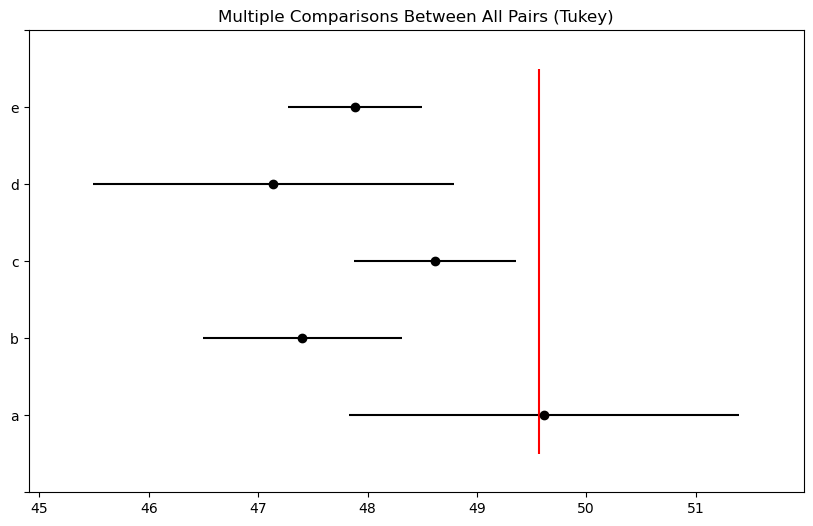

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age,     # Data
                          groups=voter_prof,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary